In [1]:
import pandas as pd #pandas library to import csv and perform operations

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path) #assigned a variable to file in read mode

# Specify the countries for which you want to calculate the average exchange rate
selected_countries = ['Australia Dollar', 'USA Dollar', 'India Rupee', 'Canada Dollar', 'Egypt Pound']

# Filter data for the specified countries
filtered_data = exchange_rates_df[exchange_rates_df['Country/Currency'].isin(selected_countries)]

# Calculate the average exchange rate for each country
average_exchange_rate = filtered_data.groupby('Country/Currency')['value'].mean()

# Print average exchange rate values
print('\nAverage Exchange Rate Values:')
for country in selected_countries:
    value = average_exchange_rate.loc[country]
    print(f'{country}: {value}')


Average Exchange Rate Values:
Australia Dollar: 1.5710636736401673
USA Dollar: 1.0686277740585775
India Rupee: 85.8248389121339
Canada Dollar: 1.414709569037657
Egypt Pound: 26.17332587726639


In [5]:
import pandas as pd   #pandas library to import csv and perform operations

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format with the specified format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Specify the years for which you want to calculate the average (2021, 2022, 2023)
selected_years = [2021, 2022, 2023]

# TO Calculate and print the average exchange rate for India Rupee for each specified year
for year in selected_years: #checks year in selected_years
    average_rate = exchange_rates_df[(exchange_rates_df['Country/Currency'] == 'India Rupee') & (exchange_rates_df['date'].dt.year == year)]['value'].mean()
    print(f'The average currency Exchange rate of India Rupee for the year {year} is: {average_rate}')


The average currency Exchange rate of India Rupee for the year 2021 is: 85.21076446666666
The average currency Exchange rate of India Rupee for the year 2022 is: 82.71764421311477
The average currency Exchange rate of India Rupee for the year 2023 is: 89.23687574702382


The average currency Exchange rate of India Rupee for the year 2021 is: 85.21076446666666
Mean Squared Error for the year 2021: 0.22300115674278345

The average currency Exchange rate of India Rupee for the year 2022 is: 82.71764421311477
Mean Squared Error for the year 2022: 4.987053762059518

The average currency Exchange rate of India Rupee for the year 2023 is: 89.23687574702382
Mean Squared Error for the year 2023: 1.4423823985968085



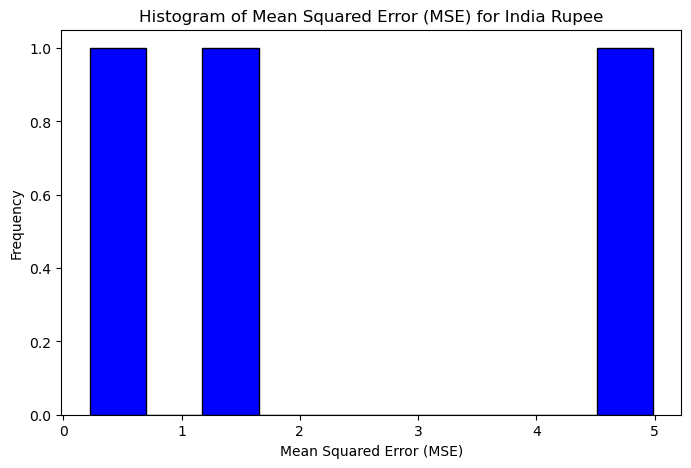

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format with the specified format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Specify the years for which you want to calculate the average (2021, 2022, 2023)
selected_years = [2021, 2022, 2023]

# Initialize a list to store MSE values
mse_values = []

# To Calculate and print the average exchange rate for India Rupee for each specified year
for year in selected_years:
    # Filter data for the specified year and Indian Rupee
    year_data = exchange_rates_df[(exchange_rates_df['Country/Currency'] == 'India Rupee') & (exchange_rates_df['date'].dt.year == year)]

    # Calculate the mean exchange rate for the specified year
    average_rate = year_data['value'].mean()

    # Predicted exchange rate (simple prediction using the mean of the exchange rates)
    predicted_exchange_rate = year_data['value'].mean()

    # Calculate Mean Squared Error (MSE)
    mse = ((year_data['value'] - predicted_exchange_rate) ** 2).mean()
    mse_values.append(mse)

    print(f'The average currency Exchange rate of India Rupee for the year {year} is: {average_rate}')
    print(f'Mean Squared Error for the year {year}: {mse}\n')

# Plotting the MSE values in a histogram
plt.figure(figsize=(8, 5))
plt.hist(mse_values, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Mean Squared Error (MSE) for India Rupee')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.show()



Statistics for USA Dollar in 2021:

count    15.000000
mean      1.130525
std       0.003819
min       1.123810
25%       1.128718
50%       1.132245
75%       1.133209
max       1.134591
Name: value, dtype: float64
IQR for 2021: 0.004491499999999871

Statistics for USA Dollar in 2022:

count    366.000000
mean       1.054172
std        0.050008
min        0.959445
25%        1.015228
50%        1.052828
75%        1.091266
max        1.146527
Name: value, dtype: float64
IQR for 2022: 0.07603799999999983

Statistics for USA Dollar in 2023:

count    336.000000
mean       1.081611
std        0.016887
min        1.046918
25%        1.069152
50%        1.082363
75%        1.093967
max        1.124669
Name: value, dtype: float64
IQR for 2023: 0.02481549999999988



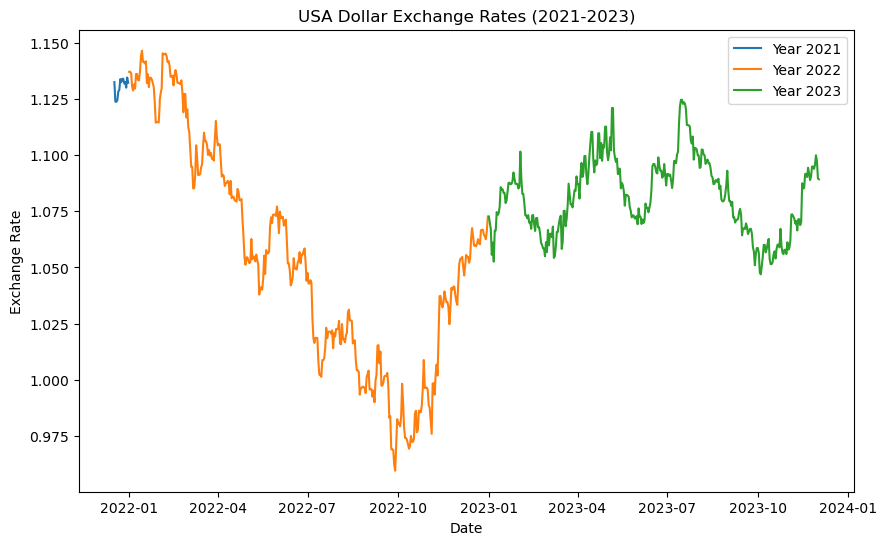

In [44]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Filter data for USA Dollar
usa_dollar_data = exchange_rates_df[exchange_rates_df['Country/Currency'] == 'USA Dollar']

# Filter data for the years 2021, 2022, and 2023
selected_years = [2021, 2022, 2023]
usa_dollar_data_selected_years = usa_dollar_data[usa_dollar_data['date'].dt.year.isin(selected_years)]

# Display statistics and prints
for year in selected_years:
    year_data = usa_dollar_data_selected_years[usa_dollar_data_selected_years['date'].dt.year == year]
    print(f"Statistics for USA Dollar in {year}:\n")
    print(year_data['value'].describe())
    
    # Calculate and print IQR using NumPy
    q3, q1 = np.percentile(year_data['value'], [75, 25])
    iqr_value = q3 - q1
    print(f"IQR for {year}: {iqr_value}\n")
    
# Plot line graphs
plt.figure(figsize=(10, 6))

for year in selected_years:
    year_data = usa_dollar_data_selected_years[usa_dollar_data_selected_years['date'].dt.year == year]
    plt.plot(year_data['date'], year_data['value'], label=f'Year {year}')

plt.title('USA Dollar Exchange Rates (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


Statistics for USA Dollar in 2021:

count    15.000000
mean      1.130525
std       0.003819
min       1.123810
25%       1.128718
50%       1.132245
75%       1.133209
max       1.134591
Name: value, dtype: float64


Statistics for USA Dollar in 2022:

count    366.000000
mean       1.054172
std        0.050008
min        0.959445
25%        1.015228
50%        1.052828
75%        1.091266
max        1.146527
Name: value, dtype: float64


Statistics for USA Dollar in 2023:

count    336.000000
mean       1.081611
std        0.016887
min        1.046918
25%        1.069152
50%        1.082363
75%        1.093967
max        1.124669
Name: value, dtype: float64




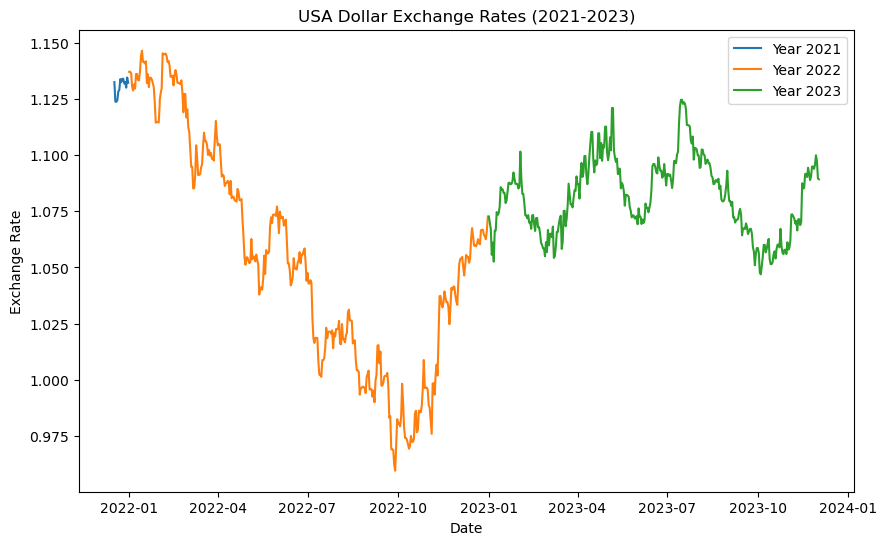

In [36]:
import pandas as pd  #pandas library to import csv and perform operations
import matplotlib.pyplot as plt  #for creating static, animated, and interactive visualizations in Python.

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Filter data for India Rupee
usa_dollar_data = exchange_rates_df[exchange_rates_df['Country/Currency'] == 'USA Dollar']

# Filter data for the years 2021, 2022, and 2023
selected_years = [2021, 2022, 2023] #assigned years to variable
usa_dollar_data_selected_years = usa_dollar_data[usa_dollar_data['date'].dt.year.isin(selected_years)]

# Display statistics and prints
for year in selected_years:
    year_data = usa_dollar_data_selected_years[usa_dollar_data_selected_years['date'].dt.year == year]
    print(f"Statistics for USA Dollar in {year}:\n")
    print(year_data['value'].describe())
    print("\n")

# Plot line graphs
plt.figure(figsize=(10, 6)) 

for year in selected_years:
    year_data = usa_dollar_data_selected_years[usa_dollar_data_selected_years['date'].dt.year == year]
    plt.plot(year_data['date'], year_data['value'], label=f'Year {year}')
#to plot the graph title tag has been used
plt.title('USA Dollar Exchange Rates (2021-2023)')
plt.xlabel('Date') #x label displays date 
plt.ylabel('Exchange Rate') #ylabel uses exchange rate
plt.legend() #area describing the elements of the graph
plt.show() #displays the graph



In [38]:
import pandas as pd
import plotly.express as px #library for creating interactive charts

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')
exchange_rates_df.set_index('date', inplace=True)

# Filter data for USA DOLLAR Rupee
usa_dollar_data = exchange_rates_df[exchange_rates_df['Country/Currency'] == 'USA Dollar'].copy()

# Calculate the moving average with a window size of 7 days
usa_dollar_data['moving_average'] = usa_dollar_data['value'].rolling(window=7).mean()

# Plot the data using Plotly
fig = px.line(usa_dollar_data, x=usa_dollar_data.index, y=['value', 'moving_average'],
              labels={'value': 'Exchange Rate', 'moving_average': 'Moving Average'},
              title='usa_dollar Exchange Rate with 7-day Moving Average')

# Set custom colors inspired by the Indian flag
fig.update_traces(line=dict(color='#FF9933'), selector=dict(name='Exchange Rate'))
fig.update_traces(line=dict(color='#138808'), selector=dict(name='Moving Average'))

# Show the plot
fig.show()

# Display the moving average for different years
years = usa_dollar_data.index.year.unique()
for year in years:
    yearly_data = usa_dollar_data[usa_dollar_data.index.year == year]
    print(f'\nMoving Average for USA Dollar in {year}:\n')
    print(yearly_data[['value', 'moving_average']])


Moving Average for USA Dollar in 2021:

               value  moving_average
date                                
2021-12-17  1.132548             NaN
2021-12-18  1.123810             NaN
2021-12-19  1.123810             NaN
2021-12-20  1.124405             NaN
2021-12-21  1.128382             NaN
2021-12-22  1.129053             NaN
2021-12-23  1.133870        1.127983
2021-12-24  1.132535        1.127981
2021-12-25  1.134039        1.129442
2021-12-26  1.134039        1.130903
2021-12-27  1.131958        1.131982
2021-12-28  1.132522        1.132574
2021-12-29  1.130067        1.132719
2021-12-30  1.134591        1.132822
2021-12-31  1.132245        1.132780

Moving Average for USA Dollar in 2022:

               value  moving_average
date                                
2022-01-01  1.137145        1.133224
2022-01-02  1.137145        1.133668
2022-01-03  1.136496        1.134316
2022-01-04  1.130601        1.134041
2022-01-05  1.128764        1.133855
...              ...          

In [17]:
import pandas as pd #pandas library to import csv and perform operations
import plotly.express as px #library for creating interactive charts

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format with the specified format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Select 'Australia Dollar' and 'India Rupee' for analysis
selected_currencies = ['Australia Dollar', 'India Rupee']

# Filter data for the selected currencies
selected_data = exchange_rates_df[exchange_rates_df['Country/Currency'].isin(selected_currencies)]

# Drop duplicate entries and keep the first occurrence
selected_data = selected_data.drop_duplicates(subset=['date', 'Country/Currency'])

# Pivot the data for easy plotting, aggregate values for duplicate dates using mean
pivot_table = selected_data.pivot_table(index=['date', 'Country/Currency'], values='value', aggfunc='mean').reset_index()

# Create an interactive line chart using Plotly Express
fig = px.line(pivot_table, x='date', y='value', color='Country/Currency',
              title='Exchange Rates - Australia Dollar and India Rupee',
              labels={'value': 'Exchange Rate'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Exchange Rate',
    legend_title='Currency',
    hovermode='x unified',
    template='plotly_dark'
)

# Show the interactive chart
fig.show()

In [19]:
import pandas as pd #pandas library to import csv and perform operations
import plotly.express as px #library for creating interactive charts

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format with the specified format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Select 'Australia Dollar' and 'India Rupee' for analysis
selected_currencies = ['Russia Rouble', 'India Rupee']

# Filter data for the selected currencies
selected_data = exchange_rates_df[exchange_rates_df['Country/Currency'].isin(selected_currencies)]

# Drop duplicate entries and keep the first occurrence
selected_data = selected_data.drop_duplicates(subset=['date', 'Country/Currency'])

# Pivot the data for easy plotting, aggregate values for duplicate dates using mean
pivot_table = selected_data.pivot_table(index=['date', 'Country/Currency'], values='value', aggfunc='mean').reset_index()

# Create an interactive line chart using Plotly Express
fig = px.line(pivot_table, x='date', y='value', color='Country/Currency',
              title='Exchange Rates - Russia Rouble and India Rupee',
              labels={'value': 'Exchange Rate'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Exchange Rate',
    legend_title='Currency',
    hovermode='x unified',
    template='plotly_dark'
)

# Show the interactive chart
fig.show()


         date  predicted_value
0  2024-01-31        88.187866
1  2024-02-29        88.486162
2  2024-03-31        88.064453
3  2024-04-30        90.033752
4  2024-05-31        89.624800
5  2024-06-30        89.092972
6  2024-07-31        89.984514
7  2024-08-31        89.984514
8  2024-09-30        89.984514
9  2024-10-31        89.984514
10 2024-11-30        89.984514
11 2024-12-31        89.984514


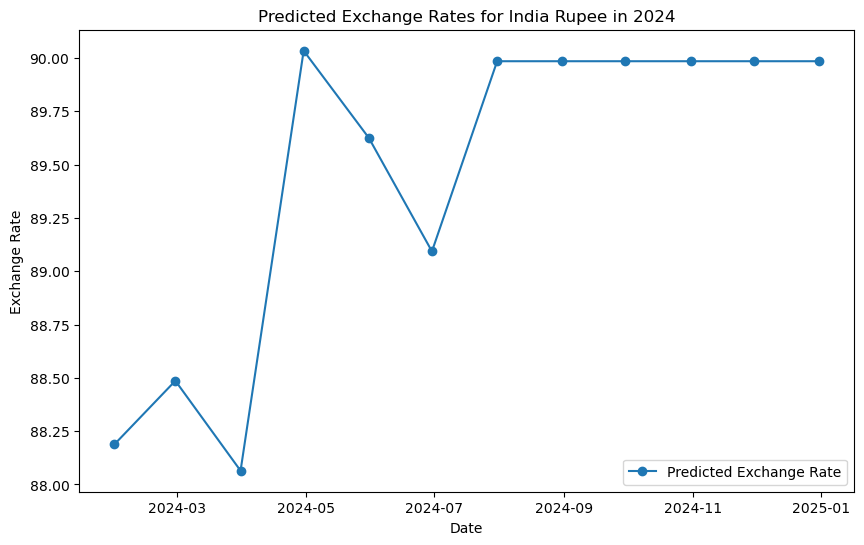

In [24]:
import pandas as pd #pandas library to import csv and perform operations
from sklearn.model_selection import train_test_split # tools for model selection, including functions for splitting datasets into training and testing sets.
from sklearn.tree import DecisionTreeRegressor # Part of scikit-learn and provides tools for working with decision tree-based models
import numpy as np  # To compute and perform Numerical computing library
import matplotlib.pyplot as plt # Importing the pyplot module for creating static plots

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format with the specified format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Filter data for India Rupee
india_rupee_data = exchange_rates_df[exchange_rates_df['Country/Currency'] == 'India Rupee'].copy()

# Feature engineering
india_rupee_data['month'] = india_rupee_data['date'].dt.month
india_rupee_data['year'] = india_rupee_data['date'].dt.year

# Select relevant features and target
features = ['month', 'year']
target = 'value'

# Split the data into training and testing sets
train_data, test_data = train_test_split(india_rupee_data, test_size=0.2, shuffle=False)

# Train a decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(train_data[features], train_data[target])

# Create a dataframe for the future dates in 2024
future_dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
future_data_2024 = pd.DataFrame({'date': future_dates_2024, 'month': future_dates_2024.month, 'year': future_dates_2024.year})

# Predict exchange rates for 2024
predicted_exchange_rates_2024 = model.predict(future_data_2024[features])

# Display the predicted values
predicted_df_2024 = pd.DataFrame({'date': future_dates_2024, 'predicted_value': predicted_exchange_rates_2024})
print(predicted_df_2024)

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.plot(predicted_df_2024['date'], predicted_df_2024['predicted_value'], marker='o', label='Predicted Exchange Rate')
plt.xlabel('Date') #plots X-axis
plt.ylabel('Exchange Rate') #Plot Y-axis
plt.title('Predicted Exchange Rates for India Rupee in 2024') #title display
plt.legend() 
plt.show()


Predicted exchange rate for India Rupee in 2024: 93.57104992158202
Predicted exchange rate for India Rupee in 2025: 98.77783628353609
Mean Squared Error on the test set: 2.8993482465371607


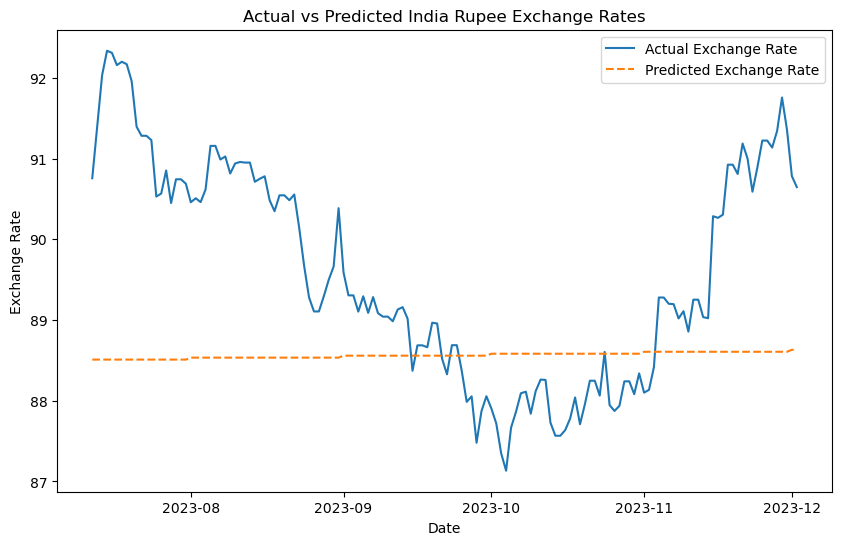

In [20]:
import pandas as pd #to import csv file and perform operations
import plotly.express as px #A high-level interface for creating interactive and expressive visualizations
from sklearn.model_selection import train_test_split # sklearn.model_selection: Provides tools for model selection, including functions for splitting datasets into training and testing sets.
from sklearn.linear_model import LinearRegression  # sklearn.linear_model: Part of scikit-learn and provides tools for working with linear regression models.
from sklearn.metrics import mean_squared_error # sklearn.metrics: Provides various metrics for evaluating machine learning models
import matplotlib.pyplot as plt # the matplotlib library for creating static plots Importing the pyplot module for creating static plots
# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Filter data for India Rupee
india_rupee_data = exchange_rates_df[exchange_rates_df['Country/Currency'] == 'India Rupee'].copy()  # Create a copy

# Feature engineering
india_rupee_data['month'] = india_rupee_data['date'].dt.month
india_rupee_data['year'] = india_rupee_data['date'].dt.year

# Select relevant features and target
features = ['month', 'year']
target = 'value'

# Split the data into training and testing sets
train_data, test_data = train_test_split(india_rupee_data, test_size=0.2, shuffle=False)

# Train a linear regression model
model = LinearRegression() #Created an instance of the Linear Regression model
model.fit(train_data[features], train_data[target]) # Train the model using the training features and target.

# Predict future exchange rates for 2024 and 2025
future_years = [2024, 2025] 
future_data = pd.DataFrame({'year': future_years, 'month': 1})  # Assuming the first month for simplicity
predicted_exchange_rates = model.predict(future_data[features])

# Display the predicted values, Iterate through the predicted exchange rates for future years
for year, rate in zip(future_years, predicted_exchange_rates):
    print(f'Predicted exchange rate for India Rupee in {year}: {rate}')

# Evaluate the model on the test set
test_predictions = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], test_predictions)
print(f'Mean Squared Error on the test set: {mse}')

# Plot the predicted values
plt.figure(figsize=(10, 6))#described plot size
plt.plot(test_data['date'], test_data['value'], label='Actual Exchange Rate')## Plotting the actual and predicted exchange rates
plt.plot(test_data['date'], test_predictions, label='Predicted Exchange Rate', linestyle='--') ## Plot predicted exchange rates with a dashed line
plt.title('Actual vs Predicted India Rupee Exchange Rates') ## Set the title of the plot
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Exchange Rate')#set the y axis
plt.legend() #display the graphs
plt.show()



In [25]:
import pandas as pd #to import csv file and perform operations
from sklearn.linear_model import LinearRegression # sklearn.linear_model: Part of scikit-learn and provides tools for working with linear regression models.
from sklearn.metrics import mean_squared_error # sklearn.metrics: Provides various metrics for evaluating machine learning models
import numpy as np   # Numerical computing library

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format with the specified format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Extract month and year from the 'date' column and add them as new columns
exchange_rates_df['month'] = exchange_rates_df['date'].dt.month
exchange_rates_df['year'] = exchange_rates_df['date'].dt.year

# Filter data for India Rupee
india_rupee_data = exchange_rates_df[exchange_rates_df['Country/Currency'] == 'India Rupee']

# Specify the features and target
features = ['month', 'year']
target = 'value'

# Train a machine learning model (e.g., Linear Regression)
model = LinearRegression() #create linear regression model
model.fit(india_rupee_data[features], india_rupee_data[target]) # Train the model on the features and target for India Rupee data

# Predict exchange rates for 2024 and 2025
future_years = [2024, 2025]
future_data = pd.DataFrame({'year': future_years, 'month': 1}) 
predicted_exchange_rates = model.predict(future_data[features])

# Prints the predicted values
print(f'Predicted exchange rates for 2024 and 2025: {predicted_exchange_rates}')

# Evaluate the model on the test set
test_predictions = model.predict(india_rupee_data[features])
mse = mean_squared_error(india_rupee_data[target], test_predictions)
std_deviation_value = np.std(test_predictions)
variance_value = np.var(test_predictions)

# Display the results
print(f'Mean Squared Error on the test set: {mse}')
print(f'Standard Deviation on the test set: {std_deviation_value}')
print(f'Variance on the test set: {variance_value}')


Predicted exchange rates for 2024 and 2025: [94.20886013 99.8524664 ]
Mean Squared Error on the test set: 4.577718509532214
Standard Deviation on the test set: 3.0067323154910044
Variance on the test set: 9.040439217017896


In [28]:
import pandas as pd #to import csv file and perform operations
from sklearn.linear_model import LinearRegression # sklearn.linear_model: Part of scikit-learn and provides tools for working with linear regression models
from sklearn.metrics import mean_squared_error # # sklearn.metrics: Provides various metrics for evaluating machine learning models
import numpy as np  # Numerical computing library
import plotly.express as px #library for creating interactive charts

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format with the specified format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Extract month and year from the 'date' column and add them as new columns
exchange_rates_df['month'] = exchange_rates_df['date'].dt.month
exchange_rates_df['year'] = exchange_rates_df['date'].dt.year

# Filter data for India Rupee
india_rupee_data = exchange_rates_df[exchange_rates_df['Country/Currency'] == 'India Rupee']

# Specify the features and target
features = ['month', 'year']
target = 'value'

# Train a machine learning model (e.g., Linear Regression)
model = LinearRegression()
model.fit(india_rupee_data[features], india_rupee_data[target])

# Predict exchange rates for 2024 and 2025
future_years = [2024, 2025]
future_data = pd.DataFrame({'year': future_years, 'month': 1}) 
predicted_exchange_rates = model.predict(future_data[features])

# Combine historical and predicted data
all_data = pd.concat([india_rupee_data, future_data.assign(value=predicted_exchange_rates)])

# Plot using Plotly Express
fig = px.line(all_data, x='date', y='value', title='Exchange Rates - India Rupee',
              labels={'value': 'Exchange Rate'},
              line_shape='linear')

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Exchange Rate',
    hovermode='x unified',
    template='plotly_dark'
)

# Show the interactive chart
fig.show()


In [ ]:
import tkinter as tk #creates gui
from tkinter import ttk # Import the ttk submodule from the tkinter module
import pandas as pd #to import csv file and perform operations

# Load the data from the CSV file
file_path = r'C:\Users\SUNYLoaner\Downloads\exchange_rates.csv'
exchange_rates_df = pd.read_csv(file_path)
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d/%m/%Y')

# Specify the countries
selected_countries = ['Australia Dollar', 'USA Dollar', 'Japan Yen', 'Argentina Peso', 'Bangladesh Taka',
                       'China Yuan/Renminbi', 'India Rupee', 'Malaysia Ringgit', 'South Africa Rand', 'Taiwan Dollar',
                       'Switzerland Franc', 'Fiji Dollar']

def fetch_data(): #fetch data function 
    selected_country = country_var.get()
    selected_year = year_var.get()

    filtered_data = exchange_rates_df[(exchange_rates_df['Country/Currency'] == selected_country) & 
                                      (exchange_rates_df['date'].dt.year == int(selected_year))]

    # Remove the 'Unnamed: 0' column from the displayed output
    if 'Unnamed: 0' in filtered_data.columns:
        filtered_data = filtered_data.drop(columns=['Unnamed: 0'])

    output_text.config(state=tk.NORMAL)
    output_text.delete('1.0', tk.END)

    if not filtered_data.empty:
        output_text.insert(tk.END, f"Selected Country: {selected_country}, Selected Year: {selected_year}\n")
        output_text.insert(tk.END, "Filtered Data:\n")
        output_text.insert(tk.END, filtered_data.to_string(index=False))
    else:
        output_text.insert(tk.END, f"No data available for {selected_country} in {selected_year}")

    output_text.config(state=tk.DISABLED)

# Create the main window
root = tk.Tk()
root.title("Exchange Rate Data Analysis")

# Adjust the window size
root.geometry("800x500")

# Label for Country selection
country_label = tk.Label(root, text="Select Country:")
country_label.pack(pady=10)

# Dropdown for Country selection
country_var = tk.StringVar()
country_dropdown = ttk.Combobox(root, textvariable=country_var, values=selected_countries)
country_dropdown.pack(pady=10)

# Label for Year entry
year_label = tk.Label(root, text="Enter Year:")
year_label.pack(pady=10)

# Entry for Year input
year_var = tk.StringVar()
year_entry = tk.Entry(root, textvariable=year_var)
year_entry.pack(pady=10)

# Button to fetch data
fetch_button = tk.Button(root, text="Fetch Data", command=fetch_data)
fetch_button.pack(pady=20)

# Text widget to display output
output_text = tk.Text(root, height=15, width=70, state=tk.DISABLED)
output_text.pack()

# Button to go back
back_button = tk.Button(root, text="Back", command=root.destroy)
back_button.pack(pady=20)

# Run the Tkinter event loop
root.mainloop()
